In [2]:
!zip upset.zip herv/deseq_*/upset.pdf

  adding: herv/deseq_line/upset.pdf (deflated 23%)
  adding: herv/deseq_retroposon/upset.pdf (deflated 24%)
  adding: herv/deseq_satellite/upset.pdf (deflated 20%)
  adding: herv/deseq_sine/upset.pdf (deflated 17%)


In [1]:
import sys
import pandas as pd
from scipy import stats
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
from venn import venn 
from upsetplot import from_contents,UpSet
from matplotlib.backends.backend_pdf import PdfPages

sys.path.append('../../')

from scripts.util import *

### ERV

In [3]:
counts = pd.read_csv('herv/deseq_erv/deseq2_norm.txt',sep='\t')

In [4]:
result_table = pd.read_csv('herv/deseq_erv/result_table.txt',sep='\t')

In [96]:
data = {}

fc_thr  = 2
pval_thr = 0.01

for i in range(0,10,2):
    res = result_table.iloc[:,[i,i+1]]
    name = res.columns[0].replace('_log2FC','')
    print(name)
    up,dn = find_top(result_table,res.columns[0],fc_thr,res.columns[1],pval_thr)#.to_list()
    data[name+' | up'] = up.index.tolist()
    data[name+' | down'] = dn.index.tolist()
    data[name+' | no change'] = list(set(result_table.index) - set(up.index) - set(dn.index))

# sort data
df = pd.DataFrame(
    [k.split(' | ') for k in data.keys()],
    index=data.keys(),
    columns=['comparison','direction']
)

df.comparison = pd.Categorical(df.comparison,categories=[
    'decitabine_vs_dmso',
    'rg3039_vs_dmso',
    'comb_vs_dmso',
    'comb_vs_decitabine',
    'comb_vs_rg3039',
])
df.direction = pd.Categorical(df.direction,categories=['up','down'])

data = dict([(k,data[k]) for k in df.sort_values(['direction','comparison']).index.to_list()])

comb_vs_dmso
up:  343
down: 278
comb_vs_decitabine
up:  250
down: 188
comb_vs_rg3039
up:  200
down: 135
decitabine_vs_dmso
up:  197
down: 168
rg3039_vs_dmso
up:  215
down: 202


In [97]:
data["comb_vs_dmso | down"] == data['comb_vs_rg3039 | down']

False

In [98]:
dict([(k,'') for k,val in data.items() if 'up' in k or 'down' in k])

{'decitabine_vs_dmso | up': '',
 'rg3039_vs_dmso | up': '',
 'comb_vs_dmso | up': '',
 'comb_vs_decitabine | up': '',
 'comb_vs_rg3039 | up': '',
 'decitabine_vs_dmso | down': '',
 'rg3039_vs_dmso | down': '',
 'comb_vs_dmso | down': '',
 'comb_vs_decitabine | down': '',
 'comb_vs_rg3039 | down': ''}

In [ ]:
fig = plt.figure(figsize=(5, 5), dpi=100)

u = UpSet(
    from_contents(dict([(k,val) for k,val in data.items() if 'up' in k or 'down' in k])),
    subset_size='count',
    # orientation='vertiCil',
    show_counts='%d',
    # include_empty_subsets=True,
    # sort_by = '-degree',
    # sort_by:{‘cardinality’, ‘degree’, ‘-cardinality’, ‘-degree’,
    sort_categories_by = '-input',
    # {‘cardinality’, ‘-cardinality’, ‘input’, ‘-input’}
    # max_subset_size = 10000,
    min_subset_size = 20,
    max_degree=2,
    intersection_plot_elements=5,
    totals_plot_elements=8,
    # present=['comb'],
).plot(fig = fig)

fig.suptitle(f'Intersections of ERV differential expression results\nabs(log2FC) > {fc_thr}; pvalue < {pval_thr}')
fig.savefig('herv/deseq_erv/upset.pdf')

In [133]:
data["comb_vs_dmso | down"] == data['comb_vs_rg3039 | down']

False

### LINE

In [ ]:
counts = pd.read_csv('herv/deseq_line/deseq2_norm.txt',sep='\t')

In [217]:
result_table = pd.read_csv('herv/deseq_line/result_table.txt',sep='\t')

In [218]:
data = {}

fc_thr  = 1
pval_thr = 0.01

for i in range(0,10,2):
    res = result_table.iloc[:,[i,i+1]]
    name = res.columns[0].replace('_log2FC','')
    print(name)
    up,dn = find_top(result_table,res.columns[0],fc_thr,res.columns[1],pval_thr)#.to_list()
    data[name+' | up'] = up.index.tolist()
    data[name+' | down'] = dn.index.tolist()
    data[name+' | no change'] = list(set(result_table.index) - set(up.index) - set(dn.index))

comb_vs_dmso
up:  902
down: 972
comb_vs_decitabine
up:  706
down: 569
comb_vs_rg3039
up:  513
down: 410
decitabine_vs_dmso
up:  443
down: 454
rg3039_vs_dmso
up:  581
down: 560


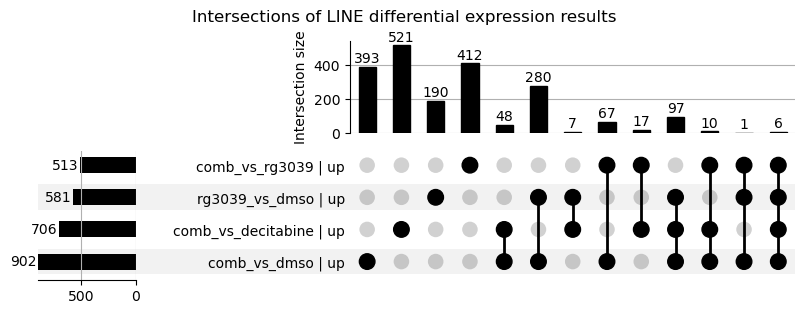

In [220]:
fig = plt.figure(figsize=(5, 5), dpi=100)

u = UpSet(
    from_contents(dict([(k,val) for k,val in data.items() if ('comb' in k or 'rg3039_vs_dmso' in k) and ('up' in k)])),
    subset_size='count',
    # orientation='vertiCil',
    show_counts='%d',include_empty_subsets=True,
    # sort_by = 'cardinality',
    max_subset_size = 10000,
    # min_subset_size = 10,
    # max_degree=3,
    intersection_plot_elements=3,
    totals_plot_elements=3,
    # present=['comb'],
).plot(fig = fig)

fig.suptitle('Intersections of LINE differential expression results')
fig.savefig('herv/deseq_line/upset.pdf')

### retroposon

In [211]:
counts = pd.read_csv('herv/deseq_retroposon/deseq2_norm.txt',sep='\t')

In [212]:
result_table = pd.read_csv('herv/deseq_retroposon/result_table.txt',sep='\t')

In [213]:
data = {}

fc_thr  = 1
pval_thr = 0.01

for i in range(0,10,2):
    res = result_table.iloc[:,[i,i+1]]
    name = res.columns[0].replace('_log2FC','')
    print(name)
    up,dn = find_top(result_table,res.columns[0],fc_thr,res.columns[1],pval_thr)#.to_list()
    data[name+' | up'] = up.index.tolist()
    data[name+' | down'] = dn.index.tolist()
    data[name+' | no change'] = list(set(result_table.index) - set(up.index) - set(dn.index))

comb_vs_dmso
up:  77
down: 107
comb_vs_decitabine
up:  33
down: 41
comb_vs_rg3039
up:  39
down: 35
decitabine_vs_dmso
up:  22
down: 40
rg3039_vs_dmso
up:  46
down: 52


In [214]:
data["comb_vs_dmso | down"] == data['comb_vs_rg3039 | down']

False

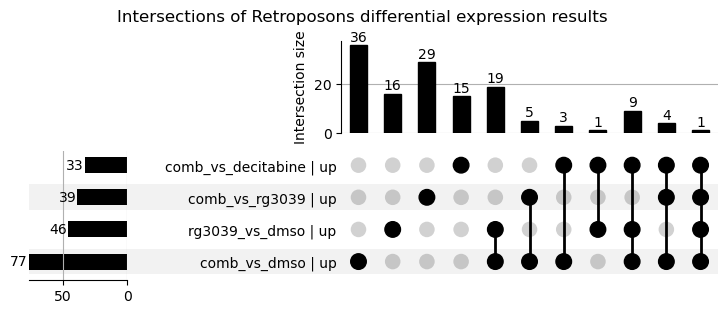

In [215]:
fig = plt.figure(figsize=(5, 5), dpi=100)

u = UpSet(
    from_contents(dict([(k,val) for k,val in data.items() if ('comb' in k or 'rg3039_vs_dmso' in k) and ('up' in k)])),
    subset_size='count',
    # orientation='vertiCil',
    show_counts='%d',include_empty_subsets=True,
    # sort_by = 'cardinality',
    max_subset_size = 10000,
    # min_subset_size = 10,
    # max_degree=3,
    intersection_plot_elements=3,
    totals_plot_elements=3,
    # present=['comb'],
).plot(fig = fig)
fig.suptitle('Intersections of Retroposons differential expression results')
fig.savefig('herv/deseq_retroposon/upset.pdf')

### SINE

In [18]:
counts = pd.read_csv('herv/deseq_sine/deseq2_norm.txt',sep='\t')

In [19]:
result_table = pd.read_csv('herv/deseq_sine/result_table.txt',sep='\t')

In [22]:
data = {}

fc_thr  = 1
pval_thr = 0.01

for i in range(0,10,2):
    res = result_table.iloc[:,[i,i+1]]
    name = res.columns[0].replace('_log2FC','')
    print(name)
    up,dn = find_top(result_table,res.columns[0],fc_thr,res.columns[1],pval_thr)#.to_list()
    data[name+' | up'] = up.index.tolist()
    data[name+' | down'] = dn.index.tolist()
    data[name+' | no change'] = list(set(result_table.index) - set(up.index) - set(dn.index))

comb_vs_dmso
up:  1011
down: 894
comb_vs_decitabine
up:  751
down: 536
comb_vs_rg3039
up:  403
down: 328
decitabine_vs_dmso
up:  304
down: 358
rg3039_vs_dmso
up:  638
down: 519


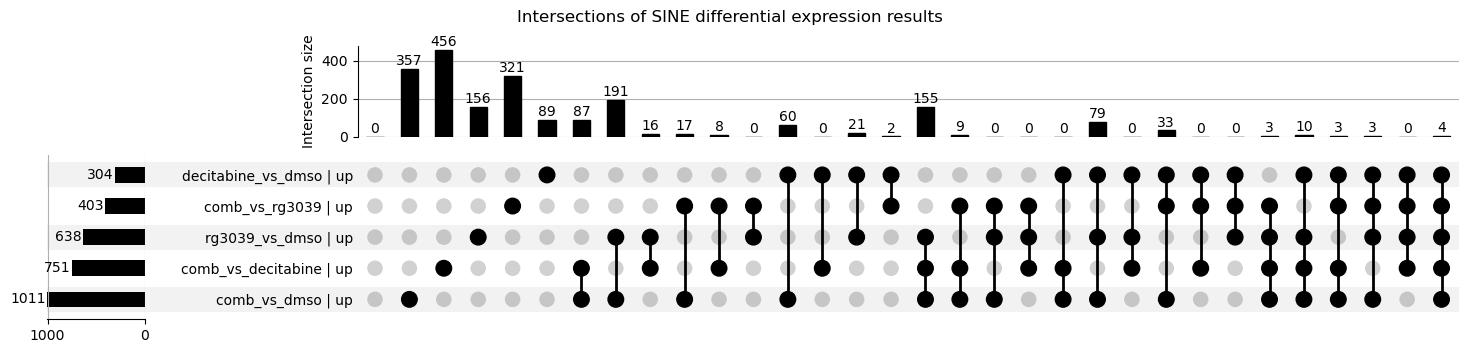

In [23]:
fig = plt.figure(figsize=(5, 5), dpi=100)

u = UpSet(
    from_contents(dict([(k,val) for k,val in data.items() if ('up' in k)])),
    subset_size='count',
    # orientation='vertiCil',
    show_counts='%d',include_empty_subsets=True,
    # sort_by = 'cardinality',
    max_subset_size = 10000,
    # min_subset_size = 10,
    # max_degree=3,
    intersection_plot_elements=3,
    totals_plot_elements=3
    # present=['comb'],
).plot(fig = fig)
fig.suptitle('Intersections of SINE differential expression results')
fig.savefig('herv/deseq_sine/upset.pdf')

### satellite

In [24]:
counts = pd.read_csv('herv/deseq_satellite/deseq2_norm.txt',sep='\t')

In [25]:
result_table = pd.read_csv('herv/deseq_satellite/result_table.txt',sep='\t')

In [26]:
data = {}

fc_thr  = 1
pval_thr = 0.01

for i in range(0,10,2):
    res = result_table.iloc[:,[i,i+1]]
    name = res.columns[0].replace('_log2FC','')
    print(name)
    up,dn = find_top(result_table,res.columns[0],fc_thr,res.columns[1],pval_thr)#.to_list()
    data[name+' | up'] = up.index.tolist()
    data[name+' | down'] = dn.index.tolist()
    data[name+' | no change'] = list(set(result_table.index) - set(up.index) - set(dn.index))

comb_vs_dmso
up:  1
down: 1
comb_vs_decitabine
up:  1
down: 1
comb_vs_rg3039
up:  0
down: 2
decitabine_vs_dmso
up:  0
down: 0
rg3039_vs_dmso
up:  1
down: 1


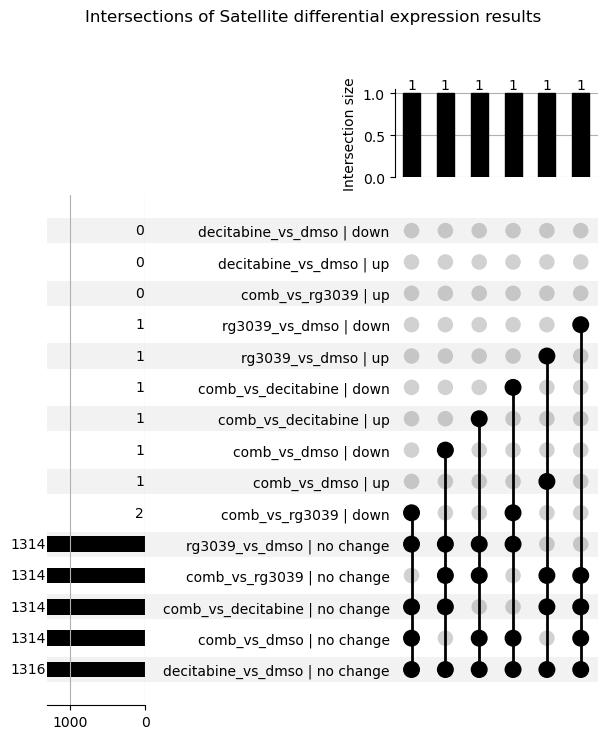

In [30]:
fig = plt.figure(figsize=(5, 5), dpi=100)

u = UpSet(
    from_contents(dict([(k,val) for k,val in data.items()])), # if ('comb' in k or 'rg3039_vs_dmso' in k) and ('up' in k)
    subset_size='count',
    # orientation='vertiCil',
    show_counts='%d',#include_empty_subsets=True,
    # sort_by = 'cardinality',
    max_subset_size = 1000,
    # min_subset_size = 10,
    # max_degree=3,
    intersection_plot_elements=3,
    totals_plot_elements=3,
    # present=['comb'],
).plot(fig = fig)
fig.suptitle('Intersections of Satellite differential expression results')
fig.savefig('herv/deseq_satellite/upset.pdf')

# 

In [13]:
!date

Mon Sep  4 23:03:26 PDT 2023
